In [1]:
#!pip install wordcloud

In [2]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords 
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.decomposition import TruncatedSVD
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("spam.csv", encoding='iso8859_14')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
data.shape

(5572, 5)

In [5]:
data.drop(labels=data.columns[2:],axis=1,inplace=True)
data.columns=['target','text']
data.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
stopwords_en = stopwords.words('english');

englishStemmer = SnowballStemmer("english")

# si no hacemos esto y usamos directo stopwords_sp, CountVectorizer devuelve un warning
stopwords_en_stem = [englishStemmer.stem(x) for x in stopwords_en]

vectorizer = CountVectorizer(stop_words = stopwords_en_stem, lowercase = True, strip_accents = 'unicode');

vectorizer.fit(data.text);

#print('Vocabulario:\n',vectorizer.vocabulary_) # vocabulario del corpus con la frecuencia de cada término

In [7]:
countvectorizer_encoding = vectorizer.transform(data.text);

pd.DataFrame(countvectorizer_encoding.todense(), 
             columns = vectorizer.get_feature_names()) # Usamos el método .todense() para ver la matriz completa

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,02,...,zebra,zed,zeros,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
tfidf_encoding = TfidfTransformer().fit_transform(countvectorizer_encoding);

pd.DataFrame(tfidf_encoding.todense(),columns = vectorizer.get_feature_names())

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,02,...,zebra,zed,zeros,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
svd = TruncatedSVD(n_components=2);

data_components = svd.fit_transform(tfidf_encoding)

data_components_df = pd.DataFrame(data_components)

In [10]:
data_components_df.head()

,0,1
0,0.051566,0.017944
1,0.141741,0.215210
2,0.034435,-0.008642
3,0.032109,0.020218
4,0.025274,0.007873


In [11]:
data_components_df.shape

(5572, 2)

In [12]:
data.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
data['target'] = np.where(data['target']=='spam',"true","false")
data.head(10)

,target,text
0,false,"Go until jurong point, crazy.. Available only ..."
1,false,Ok lar... Joking wif u oni...
2,true,Free entry in 2 a wkly comp to win FA Cup fina...
3,false,U dun say so early hor... U c already then say...
4,false,"Nah I don't think he goes to usf, he lives aro..."
5,true,FreeMsg Hey there darling it's been 3 week's n...
6,false,Even my brother is not like to speak with me. ...
7,false,As per your request 'Melle Melle (Oru Minnamin...
8,true,WINNER!! As a valued network customer you have...
9,true,Had your mobile 11 months or more? U R entitle...


In [14]:
dataframes = [data_components_df,data]
data2 = pd.concat(dataframes, axis=1)
data2.head()

,0,1,target,text
0,0.051566,0.017944,false,"Go until jurong point, crazy.. Available only ..."
1,0.141741,0.215210,false,Ok lar... Joking wif u oni...
2,0.034435,-0.008642,true,Free entry in 2 a wkly comp to win FA Cup fina...
3,0.032109,0.020218,false,U dun say so early hor... U c already then say...
4,0.025274,0.007873,false,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
data2.shape

(5572, 4)

In [16]:
data2.drop(labels=data2.columns[3:],axis=1,inplace=True)
data2.columns=['Var1','Var2','target']
data2.head()

,Var1,Var2,target
0,0.051566,0.017944,false
1,0.141741,0.215210,false
2,0.034435,-0.008642,true
3,0.032109,0.020218,false
4,0.025274,0.007873,false


In [17]:
data2.shape

(5572, 3)

In [18]:
data2['Var1'] = data2['Var1']*1000
data2['Var2'] = data2['Var2']*1000

In [19]:
data2['Var1'] = data2['Var1'].round(0)
data2['Var2'] = data2['Var2'].round(0)

In [20]:
data2.head()

,Var1,Var2,target
0,52.0,18.0,false
1,142.0,215.0,false
2,34.0,-9.0,true
3,32.0,20.0,false
4,25.0,8.0,false


<AxesSubplot:xlabel='Var1', ylabel='Var2'>

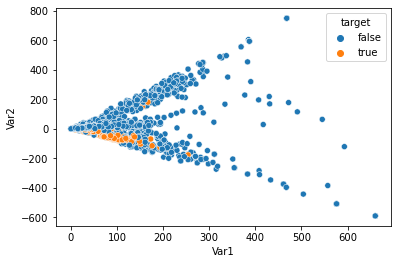

In [21]:
sns.scatterplot(x = data2.iloc[:, 0], y = data2.iloc[:, 1], hue = data.target)

In [23]:
data2.to_csv('data2vector.csv')